In [228]:
import pandas as pd
import numpy as np


In [229]:
produits=["espresso","americano","double_espresso"]
carac_prod={} #prix, emplacement, calories
carac_prod['espresso']=[1,"haut",100]
carac_prod['americano']=[2,"milieu",350]
carac_prod['double_espresso']=[1.7,"bas",200]

prod=pd.DataFrame(carac_prod).T
prod.columns=['prix','emplacement','calories']
prod

,prix,emplacement,calories
espresso,1,haut,100
americano,2,milieu,350
double_espresso,1.7,bas,200


In [230]:
taille=1000

def ventes(aff):
    L1,L2,L3=[],[],[]
    for j in range (len(aff)):
        L=[]
        for i in range (3):
            L.append(np.random.randint(5,50))
        nb=aff[j]
        L1.append(nb*L[0]/sum(L))
        L2.append(nb*L[1]/sum(L))
        L3.append(nb*L[2]/sum(L))
    return(L1,L2,L3)

ventes_matin={}
ventes_matin['affluence']=[int(np.random.exponential(5))+1 for i in range (taille)]
ventes_matin['beau_temps']=[np.random.randint(0,2) for i in range (taille)]
ventes_matin['nano_la_veille']=[np.random.randint(0,2) for i in range (taille)]
ventes_matin['espresso'],ventes_matin['americano'],ventes_matin['double_espresso']=ventes(ventes_matin['affluence'])


In [231]:
db=pd.DataFrame(ventes_matin)

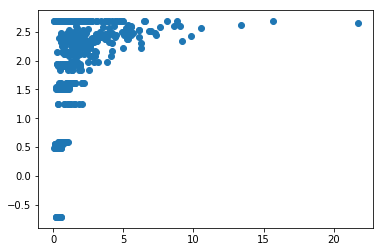

In [232]:
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X=db[db.columns[:3]]
X=sklearn.preprocessing.normalize(X)
Y=db['espresso']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.45, random_state = 5)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)
plt.scatter(Y_test, Y_pred)